## Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import os
import warnings

# set the max columns to none
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read and set directory for dataset for any OS
os.chdir('/Users/home/Library/CloudStorage/OneDrive-UniversityofKansas/RUDRO/Study Documents/FALL-23/Advanced Data Science/Final Project/Crimson-Insights-A-Comprehensive-Analysis-of-Crime-Dynamics-in-the-Heartland-KS/Datasets')

In [3]:
df = pd.read_csv('merged_kansas_state_2007_2020.csv')

In [4]:
df_ks = pd.read_csv('data_kansas_EDA.csv')

In [5]:
df.shape

(90, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   Type        90 non-null     object 
 2   2007        90 non-null     float64
 3   2008        90 non-null     float64
 4   2009        90 non-null     float64
 5   2010        90 non-null     float64
 6   2011        90 non-null     float64
 7   2012        90 non-null     float64
 8   2013        90 non-null     float64
 9   2014        90 non-null     float64
 10  2015        90 non-null     float64
 11  2016        90 non-null     float64
 12  2017        90 non-null     float64
 13  2018        90 non-null     float64
 14  2019        90 non-null     float64
 15  2020        90 non-null     float64
 16  City name   90 non-null     object 
 17  Latitude    90 non-null     float64
 18  Longitude   90 non-null     float64
dtypes: float64(16), int64(1), objec

In [7]:
# dropping the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
# checking for null values
df.isnull().sum()

Type         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
City name    0
Latitude     0
Longitude    0
dtype: int64

In [9]:
# checking for duplicate rows
df.duplicated().sum()

0

In [10]:
df_ks.shape

(336228, 31)

In [11]:
df_ks.drop(columns=['Unnamed: 0','ARRESTEE_ID', 'INCIDENT_ID', 'SUBMISSION_DATE', 'ARREST_DATE', 'ARREST_TYPE_ID', 'OFFENSE_TYPE_ID', 'OFFENDER_ID', 'OFFENSE_ID', 'VICTIM_ID', 'AGE_ID_VICT','VICTIM_SEQ_NUM', 'VICTIM_TYPE_ID', 'TIME_FOR_ARREST', 'NUMBER_OF_DAYS'], axis=1, inplace=True)
df_ks.columns

Index(['DATA_YEAR', 'AGE_ID', 'AGE_NUM', 'SEX_CODE', 'RACE_ID', 'ETHNICITY_ID',
       'WEAPON_ID', 'INCIDENT_DATE', 'INCIDENT_HOUR', 'LOCATION_ID',
       'AGE_NUM_VICT', 'SEX_CODE_VICT', 'RACE_ID_VICT', 'ETHNICITY_ID_VICT',
       'DAY_OF_WEEK', 'CRIME_AGAINST'],
      dtype='object')

In [12]:
# Alternatively, you can use a loop to convert all 'object' columns
for column in df_ks.select_dtypes(include='object').columns:
    df_ks[column] = df_ks[column].astype('category')

In [13]:
df_ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336228 entries, 0 to 336227
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   DATA_YEAR          336228 non-null  int64   
 1   AGE_ID             336228 non-null  category
 2   AGE_NUM            336227 non-null  float64 
 3   SEX_CODE           336228 non-null  category
 4   RACE_ID            336228 non-null  category
 5   ETHNICITY_ID       336228 non-null  category
 6   WEAPON_ID          336228 non-null  category
 7   INCIDENT_DATE      336228 non-null  category
 8   INCIDENT_HOUR      336228 non-null  category
 9   LOCATION_ID        336228 non-null  category
 10  AGE_NUM_VICT       130316 non-null  float64 
 11  SEX_CODE_VICT      137845 non-null  category
 12  RACE_ID_VICT       137845 non-null  category
 13  ETHNICITY_ID_VICT  137313 non-null  category
 14  DAY_OF_WEEK        336228 non-null  category
 15  CRIME_AGAINST      326447 non-null

In [14]:
df_ks['AGE_NUM_VICT'].value_counts()

19.0    4342
20.0    4138
21.0    3742
22.0    3618
25.0    3537
        ... 
93.0      30
96.0      27
91.0      25
92.0      18
97.0       4
Name: AGE_NUM_VICT, Length: 97, dtype: int64

In [15]:
# check for invalid values or inf values
df_ks['AGE_NUM_VICT'].value_counts(dropna=False)

NaN     205912
19.0      4342
20.0      4138
21.0      3742
22.0      3618
         ...  
93.0        30
96.0        27
91.0        25
92.0        18
97.0         4
Name: AGE_NUM_VICT, Length: 98, dtype: int64

In [16]:
df_ks.rename(columns={'DATA_YEAR': 'Year'}, inplace=True)

In [17]:
# checking for null values
df_ks.isnull().sum()

Year                      0
AGE_ID                    0
AGE_NUM                   1
SEX_CODE                  0
RACE_ID                   0
ETHNICITY_ID              0
WEAPON_ID                 0
INCIDENT_DATE             0
INCIDENT_HOUR             0
LOCATION_ID               0
AGE_NUM_VICT         205912
SEX_CODE_VICT        198383
RACE_ID_VICT         198383
ETHNICITY_ID_VICT    198915
DAY_OF_WEEK               0
CRIME_AGAINST          9781
dtype: int64

In [18]:
df_ks['AGE_NUM_VICT'].value_counts()

# fill the null values with the mean
df_ks['AGE_NUM_VICT'].fillna(df_ks['AGE_NUM_VICT'].mean(), inplace=True)

In [19]:
df_ks['SEX_CODE_VICT'].fillna(df_ks['SEX_CODE_VICT'].mode()[0], inplace=True)

In [20]:
df_ks['CRIME_AGAINST']

0         Property
1         Property
2         Property
3         Property
4         Property
            ...   
336223     Society
336224     Society
336225     Society
336226     Society
336227     Society
Name: CRIME_AGAINST, Length: 336228, dtype: category
Categories (3, object): ['Person', 'Property', 'Society']

In [21]:
df_ks['CRIME_AGAINST'].fillna(df_ks['CRIME_AGAINST'].mode()[0], inplace=True)

## Data transformation

In [22]:
# change the year columns to one single year column using wide to long
df = pd.melt(df, id_vars=['Type', 'City name', 'Latitude', 'Longitude'], value_vars=['2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020'], var_name='Year')

In [23]:
df.head()

,Type,City name,Latitude,Longitude,Year,value
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0


In [24]:
# rename the value column in df to Count of Types
df.rename(columns={'value':'Count of Types'}, inplace=True)

df.head()

,Type,City name,Latitude,Longitude,Year,Count of Types
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0


In [25]:
# Identify rows where 'Type' contains 'Crime Index'
crime_index_rows = df['Type'].str.contains('Crime Index')

# Create a new DataFrame for 'Crime Index' rows
crime_index_df = df[crime_index_rows]

crime_index_df.head()


,Type,City name,Latitude,Longitude,Year,Count of Types
8,Crime Index,Hutchinson,38.060844,-97.929771,2007,420.0
17,Crime Index,Kansas,39.106667,-94.676392,2007,632.4
26,Crime Index,Lawrence,38.960213,-95.277390,2007,381.8
35,Crime Index,Lenexa,38.953600,94.733600,2007,199.6
44,Crime Index,Olathe,38.881400,94.819100,2007,247.4


In [26]:
# drop the row where 'Type' contains 'Crime Index' value
# create a Boolean mask for the rows to remove
mask = df['Type'] == 'Crime Index'

# select all rows except the ones that contain 'Coca Cola'
df = df[~mask]

In [27]:
# drop the latitude and longitude columns as they are not needed
crime_index_df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

crime_index_df.head()

,Type,City name,Year,Count of Types
8,Crime Index,Hutchinson,2007,420.0
17,Crime Index,Kansas,2007,632.4
26,Crime Index,Lawrence,2007,381.8
35,Crime Index,Lenexa,2007,199.6
44,Crime Index,Olathe,2007,247.4


In [28]:
# rename the value column in crime_index_df to Value of CI
# rename the Type column to Crime Index
crime_index_df.rename(columns={'Count of Types':'Value of CI', 'Type':'Crime Index'}, inplace=True)

crime_index_df.head()


,Crime Index,City name,Year,Value of CI
8,Crime Index,Hutchinson,2007,420.0
17,Crime Index,Kansas,2007,632.4
26,Crime Index,Lawrence,2007,381.8
35,Crime Index,Lenexa,2007,199.6
44,Crime Index,Olathe,2007,247.4


In [29]:
# drop the rows Crime Index, and rename the value column to crime index
crime_index_df.drop('Crime Index', axis=1, inplace=True)

crime_index_df.rename(columns={'Value of CI':'Crime Index'}, inplace=True)

crime_index_df.head()

,City name,Year,Crime Index
8,Hutchinson,2007,420.0
17,Kansas,2007,632.4
26,Lawrence,2007,381.8
35,Lenexa,2007,199.6
44,Olathe,2007,247.4


In [30]:
# join the crime_index_df with df on the right side of the df dataframe, creating a new dataframe called df_new
df_new = pd.merge(df, crime_index_df, how='left', on=['City name', 'Year'])

df_new.head()


,Type,City name,Latitude,Longitude,Year,Count of Types,Crime Index
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0,420.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0,420.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0,420.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0,420.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0,420.0


In [31]:
df_new.shape

(1120, 7)

In [32]:
df_new.isna().sum()

Type              0
City name         0
Latitude          0
Longitude         0
Year              0
Count of Types    0
Crime Index       0
dtype: int64

In [33]:
df_new.info()

# change the Year column to int32
df_new['Year'] = df_new['Year'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            1120 non-null   object 
 1   City name       1120 non-null   object 
 2   Latitude        1120 non-null   float64
 3   Longitude       1120 non-null   float64
 4   Year            1120 non-null   object 
 5   Count of Types  1120 non-null   float64
 6   Crime Index     1120 non-null   float64
dtypes: float64(4), object(3)
memory usage: 70.0+ KB


In [34]:
df_ks.shape, df_new.shape

((336228, 16), (1120, 7))

In [35]:
df_ks.info()

# change the Year column to datetime
df_ks['Year'] = df_ks['Year'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336228 entries, 0 to 336227
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Year               336228 non-null  int64   
 1   AGE_ID             336228 non-null  category
 2   AGE_NUM            336227 non-null  float64 
 3   SEX_CODE           336228 non-null  category
 4   RACE_ID            336228 non-null  category
 5   ETHNICITY_ID       336228 non-null  category
 6   WEAPON_ID          336228 non-null  category
 7   INCIDENT_DATE      336228 non-null  category
 8   INCIDENT_HOUR      336228 non-null  category
 9   LOCATION_ID        336228 non-null  category
 10  AGE_NUM_VICT       336228 non-null  float64 
 11  SEX_CODE_VICT      336228 non-null  category
 12  RACE_ID_VICT       137845 non-null  category
 13  ETHNICITY_ID_VICT  137313 non-null  category
 14  DAY_OF_WEEK        336228 non-null  category
 15  CRIME_AGAINST      336228 non-null

In [36]:
df_new['Year'] = df_new['Year'].astype('int64')

In [37]:
# drop incident_date from df_ks
df_ks.drop('INCIDENT_DATE', axis=1, inplace=True)

## EDA

In [38]:
# drop duplicate rows from df_new
df_new.drop_duplicates(inplace=True)

In [39]:
# # drop duplicate rows from df_ks
df_ks.drop_duplicates(inplace=True)

df_ks.shape, df_new.shape


((117755, 15), (1120, 7))

In [40]:
df_new.isna().sum()

Type              0
City name         0
Latitude          0
Longitude         0
Year              0
Count of Types    0
Crime Index       0
dtype: int64

In [41]:
df_ks.isna().sum()

Year                     0
AGE_ID                   0
AGE_NUM                  1
SEX_CODE                 0
RACE_ID                  0
ETHNICITY_ID             0
WEAPON_ID                0
INCIDENT_HOUR            0
LOCATION_ID              0
AGE_NUM_VICT             0
SEX_CODE_VICT            0
RACE_ID_VICT         72606
ETHNICITY_ID_VICT    72775
DAY_OF_WEEK              0
CRIME_AGAINST            0
dtype: int64

In [42]:
# fill the missing values in df_ks with mode
df_ks['RACE_ID_VICT'].fillna(df_ks['RACE_ID_VICT'].mode()[0], inplace=True)
df_ks['ETHNICITY_ID_VICT'].fillna(df_ks['ETHNICITY_ID_VICT'].mode()[0], inplace=True)


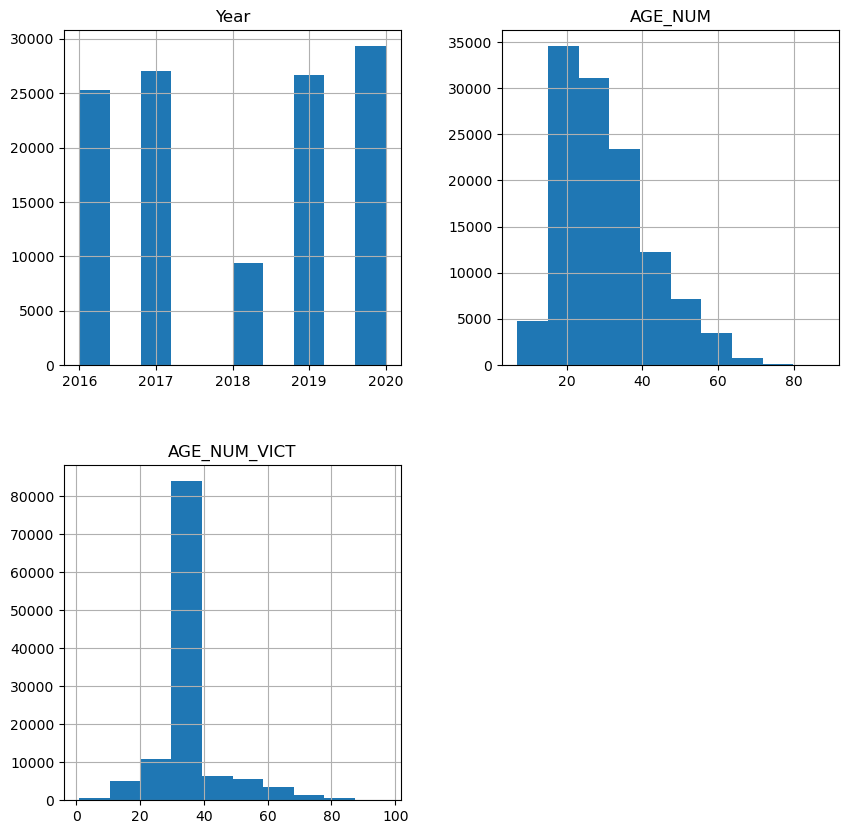

In [43]:
# draw histogram for df_ks
df_ks.hist(figsize=(10,10))
plt.show()

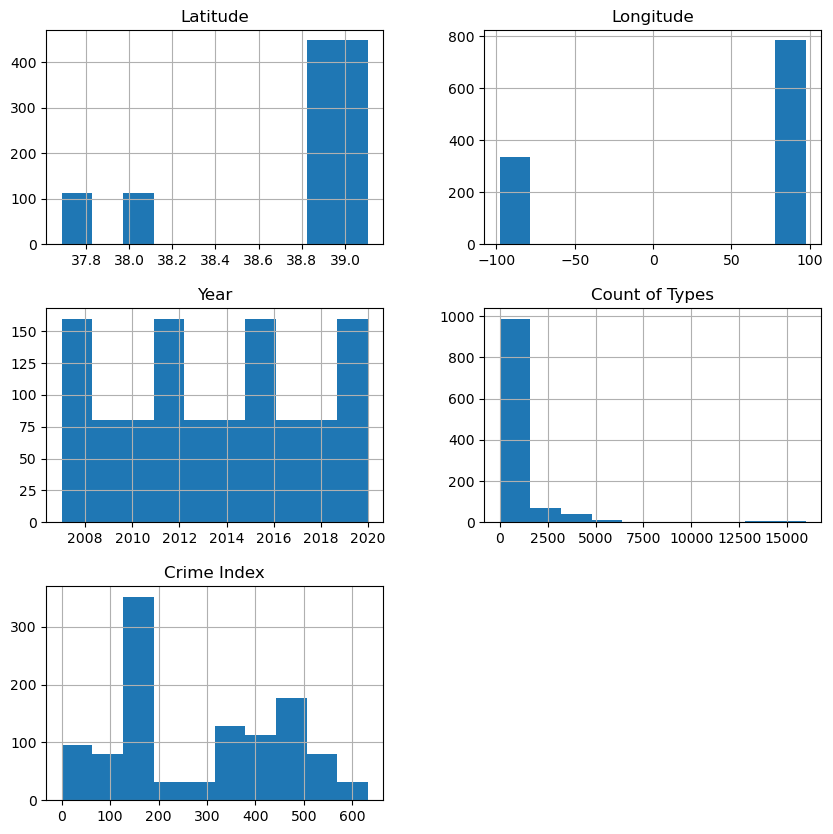

In [44]:
# draw histogram for df_ks
df_new.hist(figsize=(10,10))
plt.show()

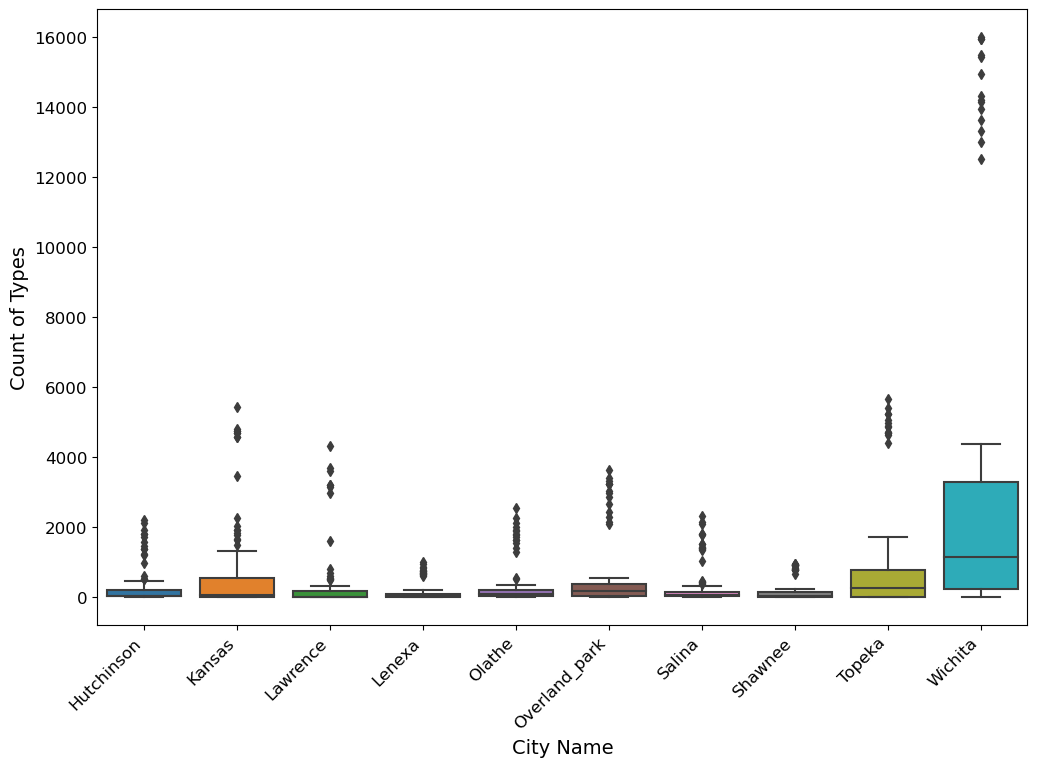

In [45]:
# Set the plot size and create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_new, x="City name", y="Count of Types")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set larger font size for x-axis and y-axis labels
plt.xlabel("City Name", fontsize=14)
plt.ylabel("Count of Types", fontsize=14)

# Set larger font size for x-axis tick labels
plt.xticks(fontsize=12)

# Set larger font size for y-axis tick labels
plt.yticks(fontsize=12)

# Show the plot
plt.show()


How does the overall crime rate change over time? Are there any noticeable patterns or trends in monthly, seasonal, or yearly crime rates?

In [46]:
df_new['Type'].value_counts()

Murders        140
Rapes          140
Robberies      140
Assaults       140
Burglaries     140
Thefts         140
Auto thefts    140
Arson          140
Name: Type, dtype: int64

In [47]:
# Group by 'Year' and aggregate the total crime index for each year
df_aggregated = df_new.groupby('Year')['Crime Index'].sum().reset_index()

# Create the time series line plot for total crime index
fig = px.line(df_aggregated, x='Year', y='Crime Index', 
              title='Time Series Graph for Year and Total Crime Index')

# Adjust the y-axis ticks if needed
fig.update_yaxes(tick0=0, dtick=3000)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

What is the total crime type over the years?

In [48]:
# Group by 'Type' and calculate the total count for each crime type
df_total_counts = df_new.groupby('Type')['Count of Types'].sum().reset_index()

# Create a bar plot for the total count of each crime type with a logarithmic y-axis
fig = px.bar(df_total_counts, x='Type', y='Count of Types',color='Type',
             title='Total Count of Crime Types (Log Scale) from 2007 to 2020',
             labels={'Count of Types': 'Total Count'},
             height=500, width=800)

# Use a logarithmic scale for the y-axis
fig.update_yaxes(type='log')

# Remove the background grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

Top 3 crime over the years

In [49]:
# Group by 'Year' and 'Type' and aggregate the count of Types for each year and type
df_aggregated = df_new.groupby(['Year', 'Type'])['Count of Types'].sum().reset_index()

# Calculate the total count for each crime type
df_total_counts = df_aggregated.groupby('Type')['Count of Types'].sum().reset_index()

# Find the top 3 crime types
top_3_types = df_total_counts.nlargest(3, 'Count of Types')['Type'].tolist()

# Filter the original DataFrame for the top 3 crime types
df_top_3 = df_aggregated[df_aggregated['Type'].isin(top_3_types)]

# Create a line plot for the top 3 crime types with years on the x-axis
fig = px.line(df_top_3, x='Year', y='Count of Types', color='Type',
              title='Trend of Top 3 Crime Types Over the Years',
              labels={'Count of Types': 'Total Count'},
              height=500, width=800)

# Normalize the y-axis
fig.update_yaxes(matches='y')

# Remove the background grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

City name and Count of the crimes

In [50]:
df_new.head()

,Type,City name,Latitude,Longitude,Year,Count of Types,Crime Index
0,Murders,Hutchinson,38.060844,-97.929771,2007,1.0,420.0
1,Rapes,Hutchinson,38.060844,-97.929771,2007,19.0,420.0
2,Robberies,Hutchinson,38.060844,-97.929771,2007,22.0,420.0
3,Assaults,Hutchinson,38.060844,-97.929771,2007,187.0,420.0
4,Burglaries,Hutchinson,38.060844,-97.929771,2007,432.0,420.0


In [51]:
# Group by 'City name' and calculate the total crime index for each city
df_aggregated = df_new.groupby('City name')['Crime Index'].sum().reset_index()

# Create a bar plot for the total crime index of each city
fig = px.bar(df_aggregated, x='City name', y='Crime Index',
             title='Total Crime Index by City',
             labels={'City name': 'City Name', 'Crime Index': 'Total Crime Index'},
             color='City name',
             height=500, width=800)

# Remove the background grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

Days of the crime 

In [52]:
df_ks['DAY_OF_WEEK'].value_counts()

Sat     18372
Fri     17926
Thue    17322
Wed     16463
Sun     16345
Tue     15988
Mon     15339
Name: DAY_OF_WEEK, dtype: int64

In [53]:
# change spelling of the days of the week
# in place = True will change the values in the dataframe

df_ks['DAY_OF_WEEK'] = df_ks['DAY_OF_WEEK'].replace({'Thue': 'Thurs'})

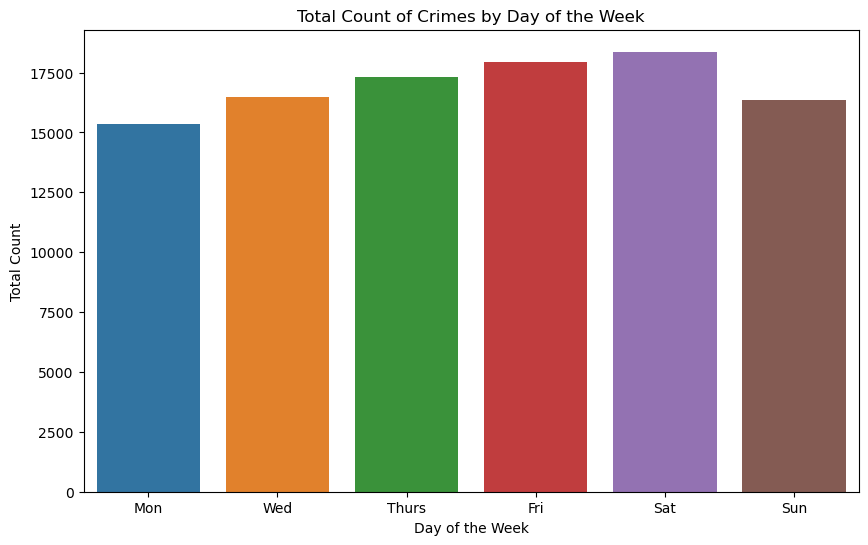

In [54]:
# visualize the day of the week with crime occurrence
plt.figure(figsize=(10, 6))

# Create a count plot for the day of the week with the total count on the y-axis
sns.countplot(x='DAY_OF_WEEK', data=df_ks, order=['Mon','Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

# Set the y-axis label
plt.ylabel('Total Count')

plt.xlabel('Day of the Week')

# Set the plot title
plt.title('Total Count of Crimes by Day of the Week')

# Show the plot
plt.show()

What is the Sex of the offenders involved in crimes?

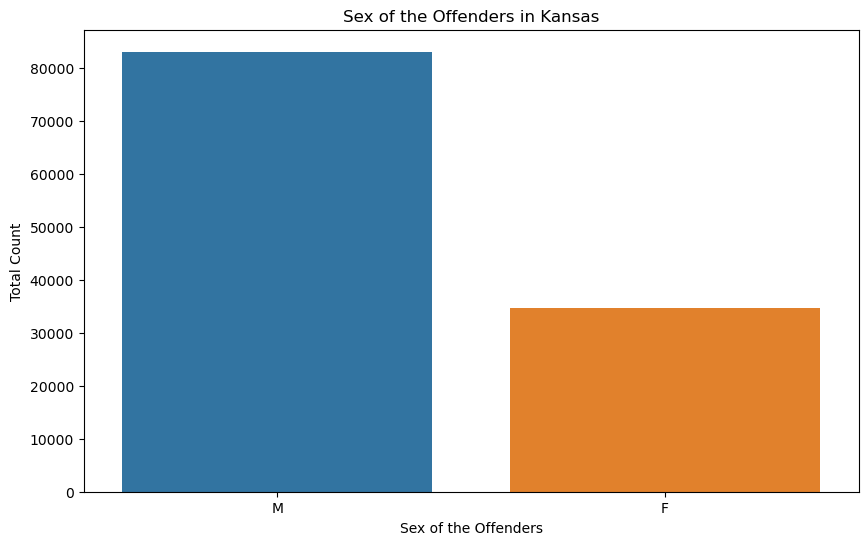

In [55]:
# visualizing the sex code of the offenders
plt.figure(figsize=(10, 6))

# Create a count plot for the day of the week with the total count on the y-axis
sns.countplot(x='SEX_CODE', data=df_ks, order=['M','F'])

# Set the y-axis label
plt.ylabel('Total Count')

plt.xlabel('Sex of the Offenders')

# Set the plot title
plt.title('Sex of the Offenders in Kansas')

# Show the plot
plt.show()

What is the race and ethnicity of offenders?

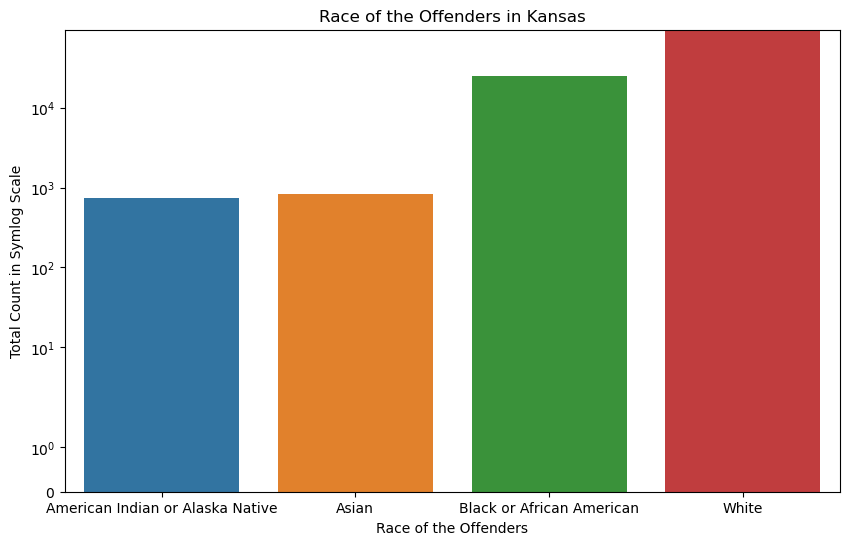

In [56]:
plt.figure(figsize=(10, 6))

# Create a count plot for the day of the week with the total count on the y-axis
sns.countplot(x='RACE_ID', data=df_ks)

# Set the y-axis label
plt.ylabel('Total Count in Symlog Scale')
# log scale for the y-axis
plt.yscale('symlog')
plt.xlabel('Race of the Offenders')

# Set the plot title
plt.title('Race of the Offenders in Kansas')

# Show the plot
plt.show()

Investigating the common weapons used during the crime in Kansas

In [57]:
df_ks['WEAPON_ID'].value_counts()

Unarmed                          112087
Lethal Cutting Instrument          2152
Handgun                            2139
Club/Blackjack/Brass Knuckles       404
Handgun (Automatic)                 246
Other Firearm                       214
Rifle                               185
Shotgun                             156
Firearm                              84
Firearm (Automatic)                  30
Rifle (Automatic)                    30
Shotgun (Automatic)                  26
Other Firearm (Automatic)             2
Name: WEAPON_ID, dtype: int64

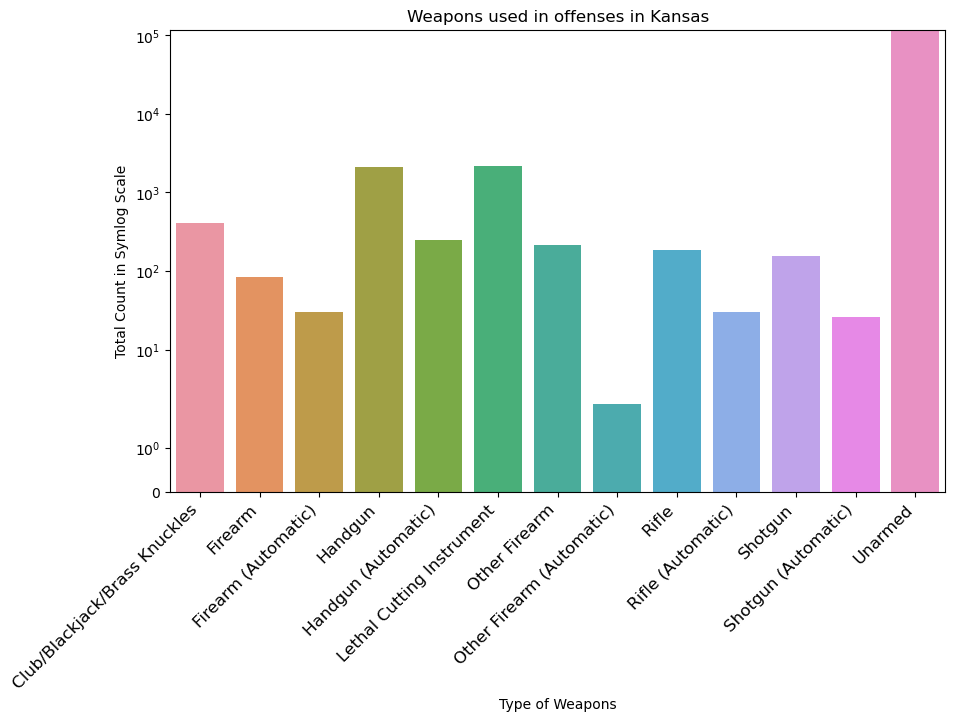

In [58]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a count plot for the day of the week with the total count on the y-axis
sns.countplot(x='WEAPON_ID', data=df_ks)

# Set the y-axis label
plt.ylabel('Total Count in Symlog Scale')

# Log scale for the y-axis
plt.yscale('symlog')

# Set the x-axis label
plt.xlabel('Type of Weapons')

# Set the x-axis ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set the plot title
plt.title('Weapons used in offenses in Kansas')

# Show the plot
plt.show()

Is there a relation with the weapons used and the crimes commiited agains?

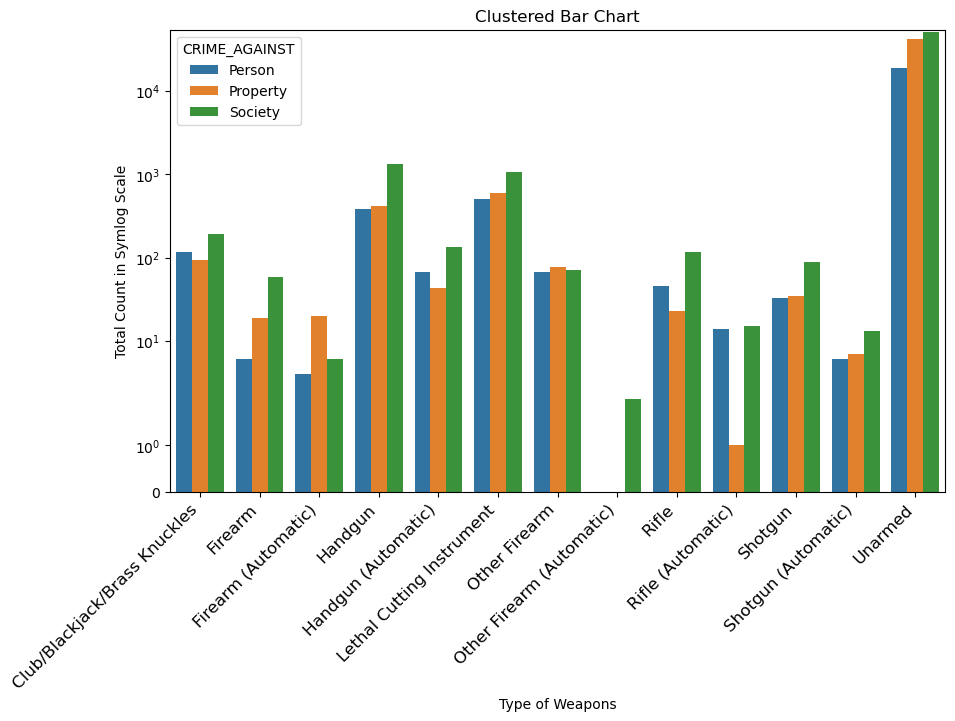

In [59]:
# visualize the crime against with weapon id
plt.figure(figsize=(10, 6))

# Create a clustered bar chart
sns.countplot(x='WEAPON_ID', hue='CRIME_AGAINST', data=df_ks)

plt.yscale('symlog')

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.ylabel('Total Count in Symlog Scale')
plt.xlabel('Type of Weapons')

# Set the plot title
plt.title('Clustered Bar Chart')

# Show the plot
plt.show()

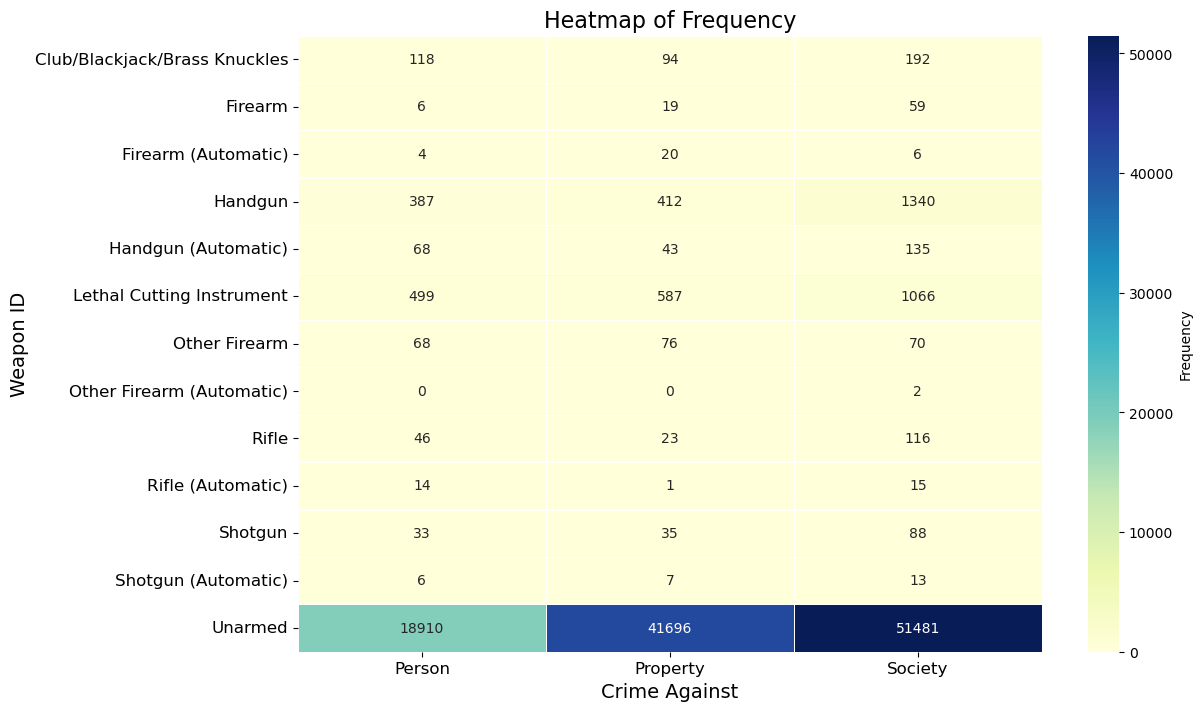

In [60]:
# Create a cross-tabulation
crosstab = pd.crosstab(df_ks['WEAPON_ID'], df_ks['CRIME_AGAINST'])

# Set the plot size
plt.figure(figsize=(12, 8))

# Create a heatmap with improved styling
sns.heatmap(crosstab, annot=True, fmt="d", cmap='YlGnBu', linewidths=.5, cbar_kws={'label': 'Frequency'})

# Set the plot title
plt.title('Heatmap of Frequency', fontsize=16)

# Set the axis labels
plt.xlabel('Crime Against', fontsize=14)
plt.ylabel('Weapon ID', fontsize=14)

# Increase font size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

Society     51481
Property    41696
Person      18910
Name: CRIME_AGAINST, dtype: int64


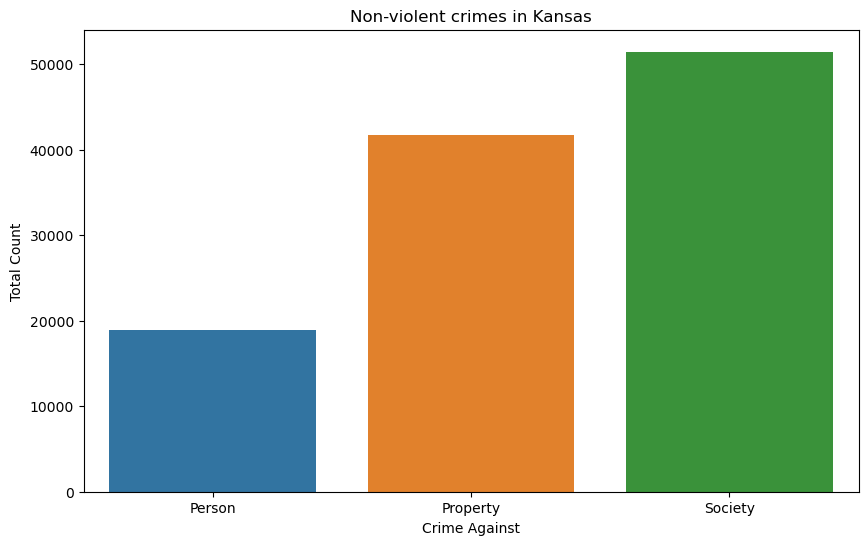

In [61]:
unarmed_crimes = df_ks[df_ks['WEAPON_ID'] == 'Unarmed']
print(unarmed_crimes['CRIME_AGAINST'].value_counts())

# visualize this data
plt.figure(figsize=(10, 6))

# Create a count plot for the day of the week with the total count on the y-axis
sns.countplot(x='CRIME_AGAINST', data=unarmed_crimes)

# Set the y-axis label
plt.ylabel('Total Count')

plt.xlabel('Crime Against')

# Set the plot title
plt.title('Non-violent crimes in Kansas')

# Show the plot
plt.show()

Nature of Crimes: Certain types of crimes might not involve traditional weapons. For example, crimes like simple assaults, verbal threats, maybe traffic violences or non-violent offenses may be categorized as "Unarmed."  
Miscategorization: There could be cases where incidents involving weapons are not properly categorized or where the weapon type is unknown, leading to a default classification as "Unarmed."  
Data Collection Bias: The data might have a bias or limitation in the way weapons are reported or recorded. Law enforcement agencies may not always specify the type of weapon used, leading to a higher frequency of "Unarmed" incidents.  

What are the races of the victims?

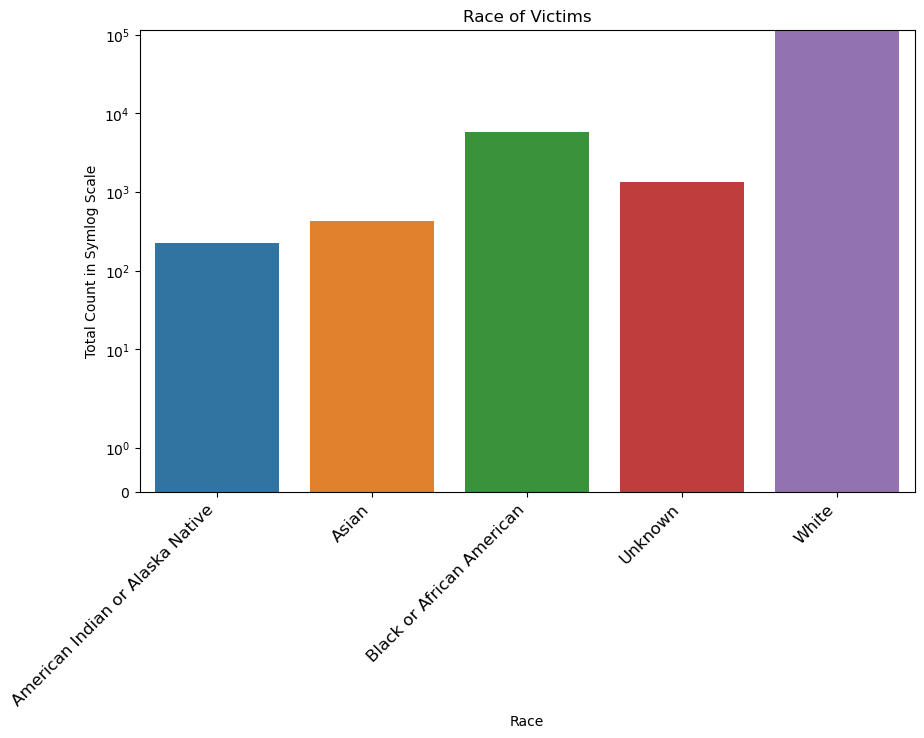

In [62]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a count plot for the day of the week with the total count on the y-axis
sns.countplot(x='RACE_ID_VICT', data=df_ks)

# Set the y-axis label
plt.ylabel('Total Count in Symlog Scale')

# Log scale for the y-axis
plt.yscale('symlog')

# Set the x-axis label
plt.xlabel('Race')

# Set the x-axis ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set the plot title
plt.title('Race of Victims')

# Show the plot
plt.show()

Age of the victims 

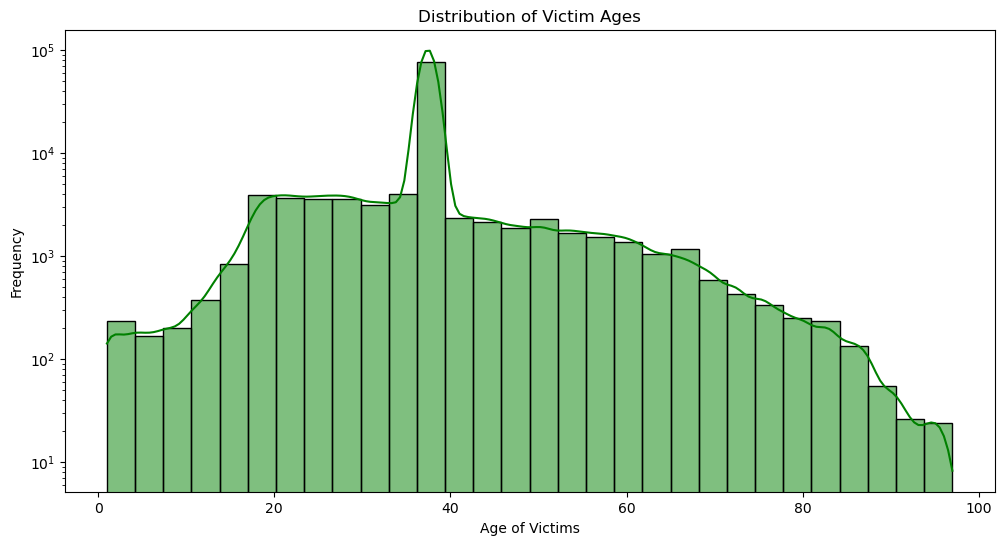

In [63]:
# Set the plot size
plt.figure(figsize=(12, 6))

# Create a histogram
sns.histplot(df_ks['AGE_NUM_VICT'], bins=30, kde=True, color='green')

# Set the plot title
plt.title('Distribution of Victim Ages')

plt.yscale('log')

# Set the axis labels
plt.xlabel('Age of Victims')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [64]:
df_new['City name'].value_counts()

Hutchinson       112
Kansas           112
Lawrence         112
Lenexa           112
Olathe           112
Overland_park    112
Salina           112
Shawnee          112
Topeka           112
Wichita          112
Name: City name, dtype: int64

In [65]:
from geopy.geocoders import Nominatim  # Add this import statement

In [66]:
# Replace 'YourCityName' with the actual city name you're interested in
cities = ['Hutchinson', 'Kansas', 'Lawrence', 'Lenexa', 'Olathe', 'Overland_park', 'Salina', 'Shawnee', 'Topeka', 'Wichita']

# Initialize the geolocator
geolocator = Nominatim(user_agent="my_geocoder")

# Create a DataFrame to store coordinates
coordinates_df = pd.DataFrame(columns=['City', 'Latitude', 'Longitude'])

# Get coordinates for each city
for city in cities:
    city_name = f"{city}, Kansas, USA"
    location = geolocator.geocode(city_name)
    
    if location:
        coordinates_df = coordinates_df.append({'City': city, 'Latitude': location.latitude, 'Longitude': location.longitude}, ignore_index=True)
    else:
        print(f"Coordinates for {city_name} not found.")

# Print the DataFrame with coordinates
print(coordinates_df)

            City   Latitude  Longitude
0     Hutchinson  38.060844 -97.929774
1         Kansas  37.819797 -95.079616
2       Lawrence  38.971938 -95.235950
3         Lenexa  38.969746 -94.784584
4         Olathe  38.883886 -94.818870
5  Overland_park  38.974250 -94.685170
6         Salina  38.840280 -97.611424
7        Shawnee  39.027368 -95.762754
8         Topeka  39.049011 -95.677556
9        Wichita  37.692236 -97.337545


In [67]:
# Merge the df_new DataFrame with coordinates_df based on the 'City name' column
df_new = df_new.merge(coordinates_df[['City', 'Latitude', 'Longitude']], 
                      left_on='City name', right_on='City', how='left')

# Drop redundant columns
df_new = df_new.drop(['Latitude_x', 'Longitude_x', 'City'], axis=1)

# Rename the columns to replace the original latitude and longitude columns
df_new = df_new.rename(columns={'Latitude_y': 'Latitude', 'Longitude_y': 'Longitude'})

# Print the updated DataFrame
print(df_new.head())

         Type   City name  Year  Count of Types  Crime Index   Latitude  \
0     Murders  Hutchinson  2007             1.0        420.0  38.060844   
1       Rapes  Hutchinson  2007            19.0        420.0  38.060844   
2   Robberies  Hutchinson  2007            22.0        420.0  38.060844   
3    Assaults  Hutchinson  2007           187.0        420.0  38.060844   
4  Burglaries  Hutchinson  2007           432.0        420.0  38.060844   

   Longitude  
0 -97.929774  
1 -97.929774  
2 -97.929774  
3 -97.929774  
4 -97.929774  


In [68]:
# Drop rows with missing latitude or longitude values
df_new_cleaned = df_new.dropna(subset=['Latitude', 'Longitude'])

# Create a scatter mapbox with the latitude and longitude for each city
fig = px.scatter_mapbox(df_new_cleaned, lat='Latitude', lon='Longitude', 
                        hover_name='City name', hover_data=['City name'],
                        color='Crime Index', size='Crime Index',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, zoom=5, mapbox_style='carto-positron',
                        center={"lat": 37.0902, "lon": -95.7129},
                        title='Scatter Mapbox of Crime Index by City')

# Show the plot
fig.show()

In [69]:
fig = px.scatter_geo(df_new, lat="Latitude", lon="Longitude", color="Type", hover_name="City name", size="Crime Index",
                     animation_frame="Year",  scope = 'north america',center={"lat": 37.0902, "lon": -95.7129}, projection="natural earth", title='Crime Index by City from 2007 to 2020', size_max=15)

fig.show()

## Crime Index for next 10 years in Kansas

In [70]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            1120 non-null   object 
 1   City name       1120 non-null   object 
 2   Year            1120 non-null   int64  
 3   Count of Types  1120 non-null   float64
 4   Crime Index     1120 non-null   float64
 5   Latitude        1120 non-null   float64
 6   Longitude       1120 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 70.0+ KB


In [71]:
# create new df without the latitude and longitude columns
df_new_2 = df_new.drop(columns=['Latitude', 'Longitude'], axis=1)

df_new_2.head()

,Type,City name,Year,Count of Types,Crime Index
0,Murders,Hutchinson,2007,1.0,420.0
1,Rapes,Hutchinson,2007,19.0,420.0
2,Robberies,Hutchinson,2007,22.0,420.0
3,Assaults,Hutchinson,2007,187.0,420.0
4,Burglaries,Hutchinson,2007,432.0,420.0


In [72]:
# label encode the categorical columns
from sklearn.preprocessing import LabelEncoder

# create an object of the LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
df_new_2['Type'] = le.fit_transform(df_new_2['Type'])
df_new_2['City name'] = le.fit_transform(df_new_2['City name'])

df_new_2.head()

,Type,City name,Year,Count of Types,Crime Index
0,4,0,2007,1.0,420.0
1,5,0,2007,19.0,420.0
2,6,0,2007,22.0,420.0
3,1,0,2007,187.0,420.0
4,3,0,2007,432.0,420.0


In [73]:
# encode the Year column
df_new_2['Year'] = le.fit_transform(df_new_2['Year'])

df_new_2.head()

,Type,City name,Year,Count of Types,Crime Index
0,4,0,0,1.0,420.0
1,5,0,0,19.0,420.0
2,6,0,0,22.0,420.0
3,1,0,0,187.0,420.0
4,3,0,0,432.0,420.0


In [74]:
df_new_2.shape

(1120, 5)

<AxesSubplot: >

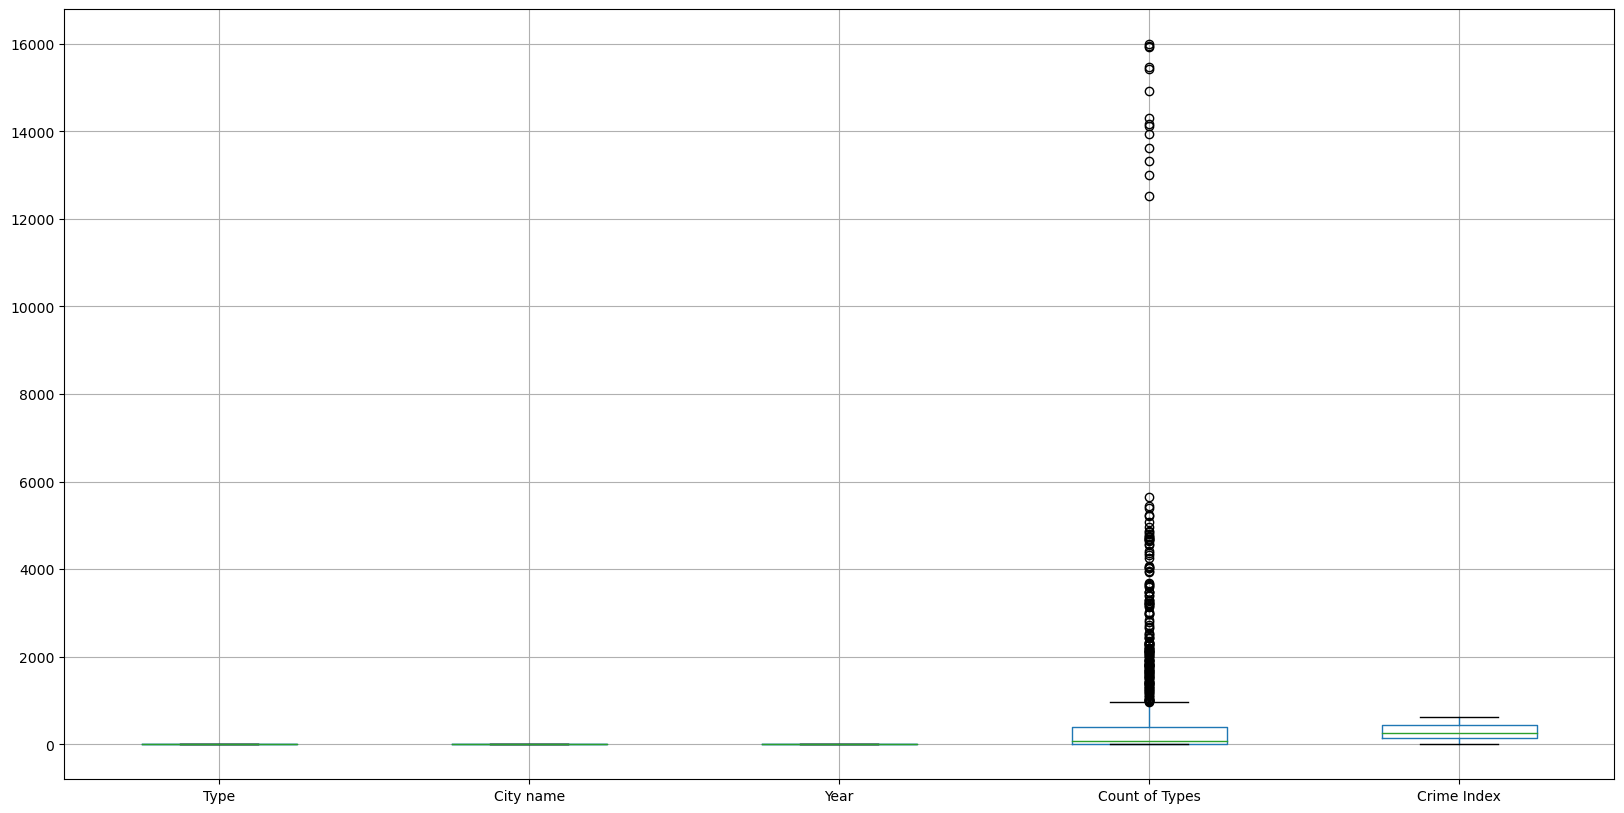

In [75]:
# check for outliers in df_new_2
df_new_2.boxplot(figsize=(20,10))


In [76]:
from sklearn.model_selection import train_test_split

# create X and y
X = df_new_2.iloc[:, :-1]
X.head()

,Type,City name,Year,Count of Types
0,4,0,0,1.0
1,5,0,0,19.0
2,6,0,0,22.0
3,1,0,0,187.0
4,3,0,0,432.0


In [77]:
y = df_new_2.iloc[:, -1]
y.head()

0    420.0
1    420.0
2    420.0
3    420.0
4    420.0
Name: Crime Index, dtype: float64

In [78]:
from sklearn.preprocessing import StandardScaler

# create an object of the StandardScaler
scaler = StandardScaler()

# fit with the X_train
scaler.fit(X)

# transform the data
X = scaler.transform(X)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((784, 4), (336, 4))

In [79]:
# import the model
from sklearn.linear_model import LinearRegression

# instantiate the model
lin_reg = LinearRegression()

# fit the model
lin_reg.fit(X_train, y_train)

# predict the values
y_pred = lin_reg.predict(X_test)

In [80]:
# import the metrics
from sklearn.metrics import r2_score, mean_squared_error, f1_score, accuracy_score, mean_absolute_error


# Calculate and print regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 23403.77148067597
Root Mean Squared Error (RMSE): 152.98291238133743
Mean Absolute Error (MAE): 136.86780958706393
R-squared (R2): 0.2086696425198713


In [81]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regressor
decision_tree_reg = DecisionTreeRegressor()

# Train the model
decision_tree_reg.fit(X_train, y_train)

# Make predictions
y_pred_decision_tree = decision_tree_reg.predict(X_test)


# Calculate and print regression metrics
mse = mean_squared_error(y_test, y_pred_decision_tree)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_decision_tree)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 981.2220833333331
Root Mean Squared Error (RMSE): 31.324464613674294
Mean Absolute Error (MAE): 4.2208333333333385
R-squared (R2): 0.2086696425198713


In [82]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
random_forest_reg = RandomForestRegressor()

# Train the model
random_forest_reg.fit(X_train, y_train)

# Make predictions
y_pred_random_forest = random_forest_reg.predict(X_test)

# Calculate and print regression metrics
mse = mean_squared_error(y_test, y_pred_random_forest)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_random_forest)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 385.46220278868975
Root Mean Squared Error (RMSE): 19.633191355169178
Mean Absolute Error (MAE): 4.1018422619047605
R-squared (R2): 0.2086696425198713


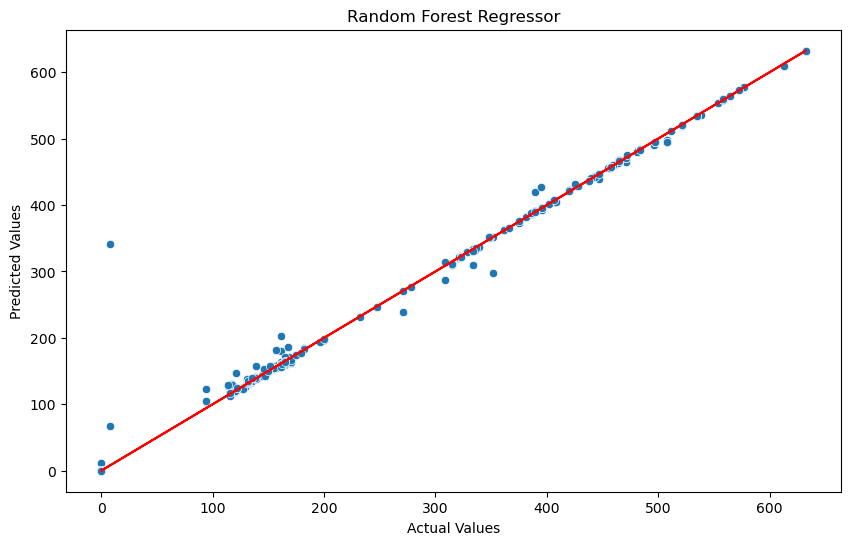

In [83]:
# plot random forest regressor
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred_random_forest)

# draw a straight line
plt.plot(y_test, y_test, 'r')

# Set the y-axis label
plt.ylabel('Predicted Values')

plt.xlabel('Actual Values')

# Set the plot title
plt.title('Random Forest Regressor')

# Show the plot
plt.show()

In [84]:
# # hyperparameter tuning for random forest regressor
# from sklearn.model_selection import GridSearchCV

# # Create a dictionary with hyperparameters and possible values
# param_grid = {'n_estimators': [100, 200, 300, 400, 500],
#               'max_depth': [1, 2, 3, 4, 5],
#               'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5]}

# # Create a grid search object with 5-fold cross validation  
# grid_search = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid, cv=10, n_jobs=-1)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# # print(grid_search.best_estimator_)
# # print(grid_search.best_index_)
# # print(grid_search.scorer_)
# # print(grid_search.n_splits_)
# # print(grid_search.refit_time_)
# # print(grid_search.cv_results_)

In [85]:
# # Get the best model
# best_dt_model = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_dt_model.predict(X_test)

# # Evaluate the performance
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred_random_forest)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("Mean Absolute Error:", mae)
# print("R-squared:", r2)

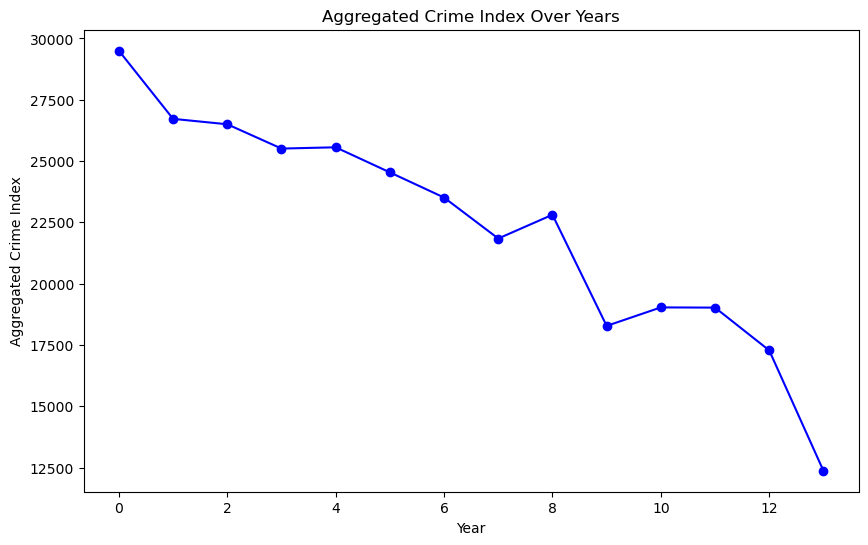

In [86]:
# Aggregate or sum the crime index for each year
agg_df = df_new_2.groupby('Year')['Crime Index'].sum().reset_index()

# Plot the aggregated crime index over the years
plt.figure(figsize=(10, 6))
plt.plot(agg_df['Year'], agg_df['Crime Index'], marker='o', linestyle='-', color='b')
plt.title('Aggregated Crime Index Over Years')
plt.xlabel('Year')
plt.ylabel('Aggregated Crime Index')
plt.grid(False)
plt.show()

## Time series forecasting for different crime types

In [87]:
df_new.head()

,Type,City name,Year,Count of Types,Crime Index,Latitude,Longitude
0,Murders,Hutchinson,2007,1.0,420.0,38.060844,-97.929774
1,Rapes,Hutchinson,2007,19.0,420.0,38.060844,-97.929774
2,Robberies,Hutchinson,2007,22.0,420.0,38.060844,-97.929774
3,Assaults,Hutchinson,2007,187.0,420.0,38.060844,-97.929774
4,Burglaries,Hutchinson,2007,432.0,420.0,38.060844,-97.929774


In [88]:
df_ks.head()

,Year,AGE_ID,AGE_NUM,SEX_CODE,RACE_ID,ETHNICITY_ID,WEAPON_ID,INCIDENT_HOUR,LOCATION_ID,AGE_NUM_VICT,SEX_CODE_VICT,RACE_ID_VICT,ETHNICITY_ID_VICT,DAY_OF_WEEK,CRIME_AGAINST
0,2016,Age in Years,42.0,F,White,Not Hispanic or Latino,Unarmed,09:00:00,Residence/Home,37.43934,M,White,Not Hispanic or Latino,Mon,Property
1,2016,Age in Years,56.0,F,White,Not Hispanic or Latino,Unarmed,09:00:00,Residence/Home,37.43934,M,White,Not Hispanic or Latino,Mon,Property
2,2016,Age in Years,22.0,M,White,Not Hispanic or Latino,Unarmed,09:00:00,Residence/Home,37.43934,M,White,Not Hispanic or Latino,Mon,Property
3,2016,Age in Years,47.0,M,Black or African American,Not Hispanic or Latino,Unarmed,14:00:00,Commercial/Office Building,50.00000,F,Black or African American,Not Hispanic or Latino,Sat,Property
4,2016,Age in Years,22.0,F,White,Not Hispanic or Latino,Unarmed,08:00:00,Residence/Home,37.43934,M,White,Not Hispanic or Latino,Wed,Property


In [89]:
# new with Year as column, values of the Type column as individual columns, and the count of each type as values
# add city name as a column, crime index as a column, latitude and longitude as columns
df_new_3 = df_new.pivot_table(index=['Year', 'City name', 'Latitude', 'Longitude', 'Crime Index'], columns='Type', values='Count of Types', aggfunc='sum').reset_index()

df_new_3.head()

Type,Year,City name,Latitude,Longitude,Crime Index,Arson,Assaults,Auto thefts,Burglaries,Murders,Rapes,Robberies,Thefts
0,2007,Hutchinson,38.060844,-97.929774,420.0,32.0,187.0,104.0,432.0,1.0,19.0,22.0,1805.0
1,2007,Kansas,37.819797,-95.079616,632.4,0.0,549.0,2017.0,2269.0,20.0,91.0,489.0,5431.0
2,2007,Lawrence,38.971938,-95.235950,381.8,23.0,299.0,196.0,550.0,0.0,48.0,63.0,4313.0
3,2007,Lenexa,38.969746,-94.784584,199.6,14.0,68.0,156.0,196.0,0.0,7.0,14.0,1009.0
4,2007,Olathe,38.883886,-94.818870,247.4,17.0,555.0,116.0,346.0,2.0,37.0,39.0,2553.0


In [90]:
# building a time series forecasting model for the different types of crimes in Kansas over the years
df_new_3.shape

(140, 13)

In [91]:
df_new_3.isnull().sum()

Type
Year           0
City name      0
Latitude       0
Longitude      0
Crime Index    0
Arson          0
Assaults       0
Auto thefts    0
Burglaries     0
Murders        0
Rapes          0
Robberies      0
Thefts         0
dtype: int64

In [92]:
df_new_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         140 non-null    int64  
 1   City name    140 non-null    object 
 2   Latitude     140 non-null    float64
 3   Longitude    140 non-null    float64
 4   Crime Index  140 non-null    float64
 5   Arson        140 non-null    float64
 6   Assaults     140 non-null    float64
 7   Auto thefts  140 non-null    float64
 8   Burglaries   140 non-null    float64
 9   Murders      140 non-null    float64
 10  Rapes        140 non-null    float64
 11  Robberies    140 non-null    float64
 12  Thefts       140 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 14.3+ KB


In [93]:
# no null values in the dataframe
# check for duplicate rows
df_new_3.duplicated().sum()

0

In [109]:
df_new_4 = df_new_3.groupby('Year')['Crime Index', 'Arson', 'Assaults', 'Auto thefts', 'Burglaries', 'Murders', 'Rapes', 'Robberies', 'Thefts'].sum().reset_index()

# Convert 'Year' to datetime format
df_new_4['Year'] = pd.to_datetime(df_new_4['Year'], format='%Y')

# Set 'Year' as the index
df_new_4.set_index('Year', inplace=True)

In [110]:
df_new_4.head()

Type,Crime Index,Arson,Assaults,Auto thefts,Burglaries,Murders,Rapes,Robberies,Thefts
Year,,,,,,,,,
2007-01-01,3687.3,367.0,4952.0,6167.0,10641.0,77.0,617.0,1581.0,41597.0
2008-01-01,3340.0,382.0,4464.0,4809.0,9833.0,79.0,598.0,1228.0,37623.0
2009-01-01,3312.4,338.0,4413.0,4171.0,10325.0,79.0,617.0,1414.0,38134.0
2010-01-01,3188.5,298.0,4249.0,4179.0,10395.0,65.0,570.0,1216.0,36736.0
2011-01-01,3195.0,290.0,4141.0,4876.0,9998.0,80.0,633.0,1192.0,37486.0


In [124]:
df_new_4.shape

(14, 9)

In [123]:
# to csv file for df_new_4
df_new_4.to_csv('df_new_4.csv')

In [111]:
df_new_4.iloc[:-5]

Type,Crime Index,Arson,Assaults,Auto thefts,Burglaries,Murders,Rapes,Robberies,Thefts
Year,,,,,,,,,
2007-01-01,3687.3,367.0,4952.0,6167.0,10641.0,77.0,617.0,1581.0,41597.0
2008-01-01,3340.0,382.0,4464.0,4809.0,9833.0,79.0,598.0,1228.0,37623.0
2009-01-01,3312.4,338.0,4413.0,4171.0,10325.0,79.0,617.0,1414.0,38134.0
2010-01-01,3188.5,298.0,4249.0,4179.0,10395.0,65.0,570.0,1216.0,36736.0
2011-01-01,3195.0,290.0,4141.0,4876.0,9998.0,80.0,633.0,1192.0,37486.0
2012-01-01,3067.2,348.0,4149.0,4807.0,9633.0,58.0,566.0,1194.0,38704.0
2013-01-01,2938.9,270.0,4022.0,4719.0,8950.0,67.0,602.0,1099.0,36586.0
2014-01-01,2730.0,241.0,3862.0,4742.0,7608.0,61.0,842.0,1084.0,31650.0
2015-01-01,2851.1,285.0,4423.0,4789.0,7456.0,79.0,1032.0,1421.0,32428.0


In [112]:
df_new_4.iloc[-5:]

Type,Crime Index,Arson,Assaults,Auto thefts,Burglaries,Murders,Rapes,Robberies,Thefts
Year,,,,,,,,,
2016-01-01,2284.6,191.0,4314.0,3994.0,6117.0,58.0,637.0,1063.0,28935.0
2017-01-01,2378.8,186.0,4225.0,4175.0,5736.0,73.0,766.0,1053.0,29255.0
2018-01-01,2377.8,227.0,4992.0,4515.0,5778.0,59.0,810.0,992.0,29490.0
2019-01-01,2159.7,171.0,5032.0,4190.0,4622.0,60.0,696.0,864.0,27575.0
2020-01-01,1546.3,189.0,5099.0,3342.0,3448.0,52.0,524.0,558.0,20800.0


In [113]:
train = df_new_4.iloc[:-5]
test = df_new_4.iloc[-5:]

In [114]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [119]:
# ARIMA Model
arima_model = ARIMA(train['Crime Index'], order=(1, 1, 1))  # Adjust order as needed
arima_result = arima_model.fit()
arima_forecast = arima_result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
arima_mse = mean_squared_error(test['Crime Index'], arima_forecast)

/opt/anaconda3/envs/minimalds/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/anaconda3/envs/minimalds/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/anaconda3/envs/minimalds/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/anaconda3/envs/minimalds/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [121]:
print('ARIMA MSE:', arima_mse)

ARIMA MSE: 519485.7696469996


In [122]:
# SARIMA Model
sarima_model = SARIMAX(train['Crime Index'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust order as needed
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
sarima_mse = mean_squared_error(test['Crime Index'], sarima_forecast)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/envs/minimalds/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/anaconda3/envs/minimalds/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

 This problem is unconstrained.
